In [1]:
import numpy as np
import os.path as osp
import uproot as ur
from glob import glob

In [2]:
debug = True

if debug:
    filesAIDA = glob('/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/AIDAFile_zzh_bbbb.*.root')
else:
    filesAIDA = glob('/nfs/dust/ilc/user/bliewert/FT_ParticleNet4Tags/MarlinTestingZZH/output/AIDAFile_e2e2qqh.*.root')
    
filesAIDA.sort()

filesFinalStates:list[str] =  []

for file in filesAIDA:
    dn = osp.dirname(file)
    bn = osp.basename(file)
    
    totalsuffix = bn.replace('AIDAFile_', '').replace('.root.root', '')
    p = osp.join(dn, f'FinalStates_{totalsuffix}.root')
    
    filesFinalStates.append(p)
    
print(list(zip(filesAIDA, filesFinalStates)))

[('/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/AIDAFile_zzh_bbbb.root.root', '/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/FinalStates_zzh_bbbb.root')]


In [3]:
from zhh.analysis.FlavorTagging import parse_files, get_tot_length, plot_roc_two_cases, roc_plot_config, load_ftag_results

/cvmfs/sw.hsf.org/key4hep/releases/2024-10-03/x86_64-almalinux9-gcc14.2.0-opt/py-tqdm/4.66.3-gay4aw/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
length, y_true, tags, valid_jets_mask = parse_files(filesAIDA[0], filesFinalStates[0])
tags1, tags2 = tags
print(np.unique(y_true, return_counts=True))

tags1 = tags1[valid_jets_mask]
tags2 = tags2[valid_jets_mask]
y_true = y_true[valid_jets_mask]
length = len(y_true)

print(np.unique(y_true, return_counts=True))

21: 0
23: 0
24: 0
(array([ 1,  2,  3,  4,  5, 99], dtype=int32), array([  86,   94,  124, 2329, 1567,  400]))
(array([1, 2, 3, 4, 5], dtype=int32), array([  86,   94,  124, 2329, 1567]))


In [7]:
y_true, tags, valid_jets_mask = load_ftag_results(filesAIDA)

/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/scripts/AIDAFile_zzh_bbbb.root.root: 100%|██████████| 1/1 [00:00<00:00, 23.30it/s]

21: 0
23: 0
24: 0


In [8]:
plot_defaults = roc_plot_config['options'].clone()
plot_defaults['title_pre'] = r'$ZZH \rightarrow llccqq$ : '
plot_defaults

[('xmin', 0),
 ('xmax', 1),
 ('ymin', 0),
 ('ymax', 1),
 ('yscale', linear),
 ('title_pre', $ZZH \rightarrow llccqq$ : )]

b (ID0, n=1967), c (ID1, n=2329)
b (ID0, n=1967), c (ID1, n=2329)
b (ID0, n=1967), uds (ID2, n=304)
b (ID0, n=1967), uds (ID2, n=304)


[<Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>,
 <Figure size 600x600 with 1 Axes>]

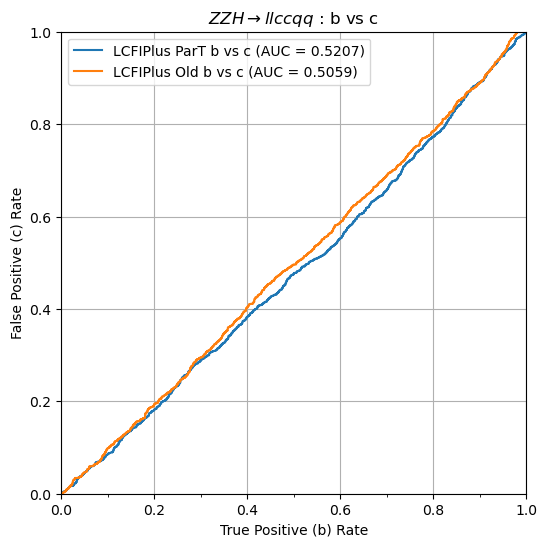

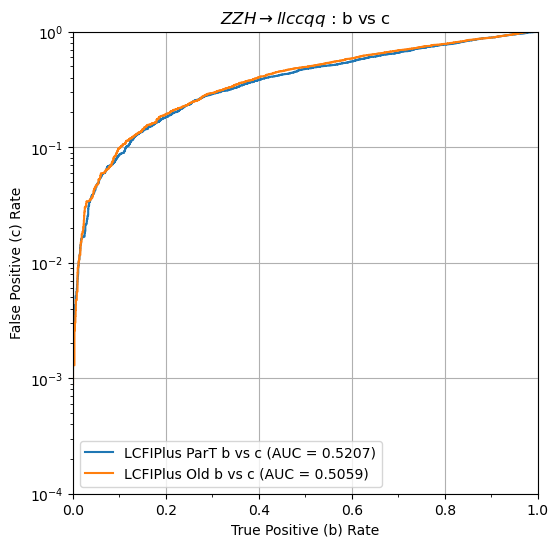

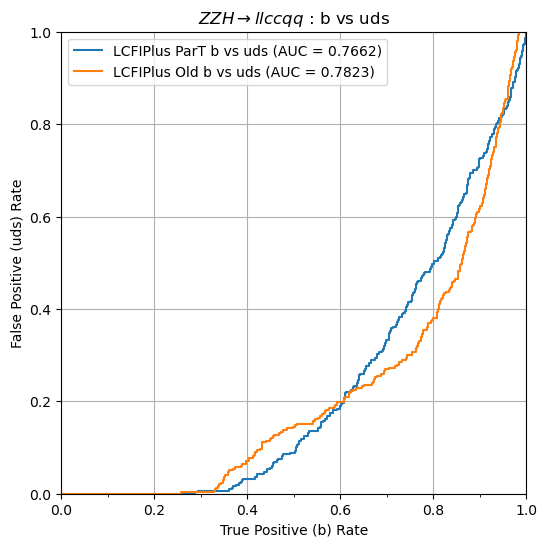

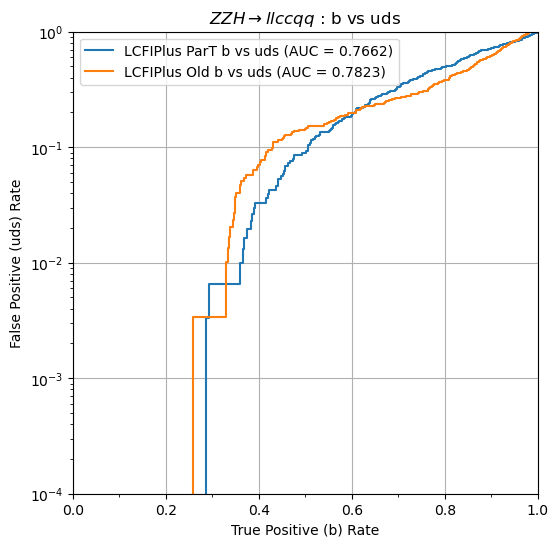

In [9]:
plot_roc_two_cases(y_true, [tags[0], tags[1]], ['LCFIPlus ParT', 'LCFIPlus Old'],
                   to_plot = [('b', 'c'), ('b', 'c'), ('b', 'uds'), ('b', 'uds')],
                   plot_defaults=plot_defaults,
                   plot_options={
                       1: { 'yscale': 'log', 'ymin': 1.E-4 },
                       3: { 'yscale': 'log', 'ymin': 1.E-4 }
})[0]

In [ ]:
np.savez('/afs/desy.de/group/flc/pool/bliewert/MarlinWorkdirs/ZHH/other/FTag/4_testing_zzh/preds_marlin_zzh.npz',
         y_true=y_true,
         tagsPNet=tagsPNet,
         tagsLCFI=tagsLCFI,
         valid_jets_mask=valid_jets_mask)

In [11]:
tagsPNet.shape

(163488, 4)

In [ ]:
(tags_LCFI.sum(axis=1) == 0).sum()

27

In [12]:
ff = ur.open(filesFinalStates[0])

In [30]:
pdgs = np.array(ff['FinalStates']['final_state_counts.first'].array(entry_stop=1))[0]
pdgs

array([ 1,  2,  3,  4,  5,  6, 11, 12, 13, 14, 15, 16, 21, 22, 23, 24, 25],
      dtype=int32)

In [37]:
np.where(pdgs == 2)[0]

array([1])

In [16]:
ff['FinalStates'].keys()

['run',
 'event',
 'error_code',
 'final_states',
 'final_state_counts',
 'final_state_counts/final_state_counts.first',
 'final_state_counts/final_state_counts.second',
 'process',
 'event_category',
 'event_category_zhh',
 'n_fermion',
 'n_higgs',
 'n_b_from_higgs',
 'n_c_from_higgs',
 'passed']

In [6]:
length

4200

In [9]:
fs_counts[fs_passed_mask]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [10]:
truth_label = np.abs(np.array(af['Jets']['TrueJetInitialElementonPDG'].array()))
truth_label

array([5, 5, 4, ..., 4, 4, 4], dtype=int32)

In [11]:
np.unique(truth_label, return_counts=True)

(array([ 1,  2,  3,  4,  5, 99], dtype=int32),
 array([  86,   94,  124, 2329, 1567,  400]))

In [29]:
af['JetTaggingComparison']['tags1'].array()

<Array [[0.998, 0.00139, ..., 0.000102], ..., [...]] type='4 * var * float32'>

In [30]:
af['JetTaggingComparison']['tags2'].array()

<Array [[0.999, 0.000418, 0.000153], ..., [...]] type='4 * var * float32'>

In [6]:
def get_tot_length(paths:list[str])->int:
    result = 0
    for path in paths:
        with ur.open(path) as rf:
            result += len(rf['JetTaggingComparison']['event'].array())
    
    return result

def parse_file(path:str):    
    with ur.open(path) as uf:
        comparison = uf['JetTaggingComparison']
        
        event_nr = np.array(comparison['event'].array(), dtype=int)
        
        tot_length = len(event_nr)

        # get the tags
        tagsPNet_raw = np.array(comparison['tags1'].array()).squeeze()

        tagsLCFI = np.array(comparison['tags2'].array()).squeeze()
        tagsPNet = np.zeros(tagsLCFI.shape)
        tagsPNet[:, [0,1,2]] = tagsPNet_raw[:, [0,1,2]]
        tagsPNet[:, 2] += tagsPNet_raw[:, 3]

        print('pre check', len(tagsPNet), tagsPNet.sum(), tagsLCFI.sum())
        
        tot_length = len(tagsPNet)
        y_true = np.zeros(tot_length)
    
        return tot_length, y_true, tagsLCFI

# TODO: # sort out invalid predictions
# some rows in LCFIPlus are zero; TODO: Why?
#        mask_invalid = tagsLCFI.sum(axis=1) == 0

In [7]:
for file in files:
    tot_length, tagsPNet, tagsLCFI = parse_file(file)

pre check 4 3.999999834195478 4.0


In [8]:
rf = ur.open(file)

In [14]:
rf['Jets'].keys()

['JetEnergy',
 'JetPt',
 'JetMomentum',
 'JetTheta',
 'JetPhi',
 'JetRapidity',
 'NCharged',
 'NNeutral',
 'NSecondaryVertices',
 'NPseudoVertices',
 'D0bprob',
 'D0cprob',
 'D0qprob',
 'Z0bprob',
 'Z0cprob',
 'Z0qprob',
 'TrkMass',
 'JetIndex',
 'Event',
 'Run',
 'TrueJetInitialElementonPDG',
 'TrueJetFinalElementonPDG',
 'TrueJetType']

In [15]:
np.array(rf['Jets']['TrueJetType'].array())

array([301,   1,   1,   1], dtype=int32)

In [17]:
np.array(rf['Jets']['TrueJetFinalElementonPDG'].array())

array([ 1, -5,  4,  4], dtype=int32)